In [2]:
#loading mnist_dataset
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np
os.chdir("C:\\Users\\Chaitanya Narva\\Documents")
mnist=pd.read_csv("mnist_train.csv")
label=mnist['label']
data=mnist.drop("label",axis=1)


In [3]:
#data preprocessing---> column standarlization
#standarlization the datapoint
standard_data=StandardScaler().fit_transform(data)
print(standard_data.shape)

(42000, 784)


In [4]:
from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standard_data[0:1000,:]
labels_1000 = label[0:1000]

tsne = TSNE(n_components=2, random_state=0) #perplexity=30 max_iter=1000 learning_rate=200
tsne_data = tsne.fit_transform(data_1000).T

In [36]:
print(tsne_data.shape)
print(len(labels_1000))

(2, 1000)
1000


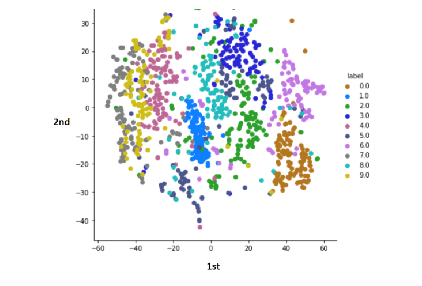

In [7]:
import matplotlib.pyplot as plt
new_data = np.vstack((tsne_data,labels_1000)).T
tsne_df = pd.DataFrame(data=new_data, columns=("1st", "2nd","label"))
tsne_df['label']=labels_1000
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, '1st', '2nd').add_legend()
plt.show()

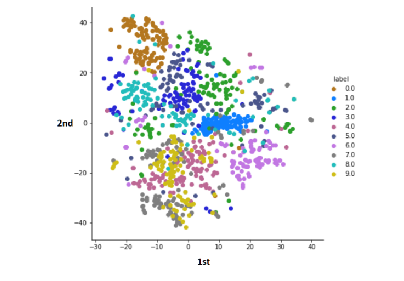

In [8]:
tsne = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = tsne.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("1st", "2nd", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, '1st', '2nd').add_legend()
plt.title('With perplexity = 50')
plt.show()

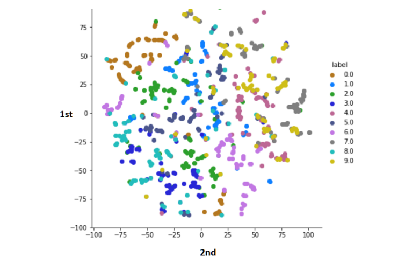

In [9]:
tsne = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = tsne.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("1st", "2nd", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, '2nd', '1st').add_legend()
plt.title('With perplexity = 2')
plt.show()

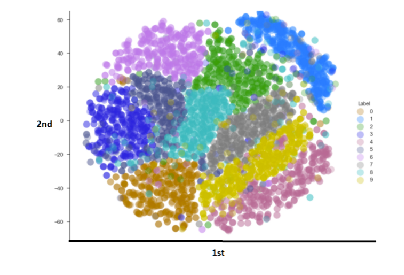

In [10]:
tsne=TSNE(n_components=2, random_state=0, perplexity=100, n_iter=1000, learning_rate=1000)
tsne_data=tsne.fit_transform(data_1000)

tsne_data=np.vstack((tsne_data,label))
df=pd.DataFrame(data=tsne_data,columns=["1st","2nd","label"])

#plotting dataframe
sns.FacetGrid(df,hue="species",size=6).map(plt.scatter,"1st","2nd").add_legend()
plt.show()